<a href="https://colab.research.google.com/github/cabamarcos/SuperMask/blob/main/MNIST_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau

import os


In [3]:
dataset = pd.read_csv('/content/train.csv')

In [4]:
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Slicing the dataset to separate feature matrix 'X' and the vector of predictions 'y'

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

X.shape, y.shape, X.dtype, y.dtype

((42000, 784), (42000,), dtype('int64'), dtype('int64'))

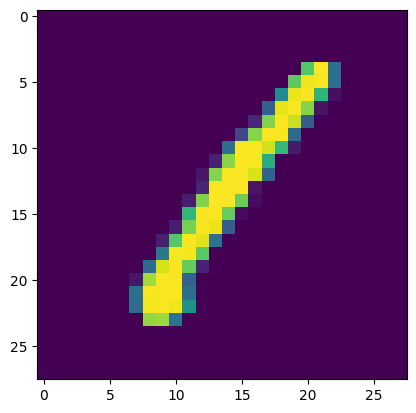

In [6]:
# Visualizing the dataset by reshaping an image into the original format i.e. 28 * 28

first_image = X[0]
first_image = first_image.reshape((28, 28))

plt.imshow(first_image)

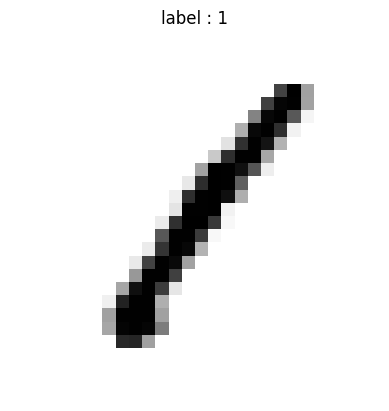

In [7]:
# Grayscaling the image, dropping the axis and printing the label

plt.imshow(first_image, "binary")
plt.title('label : {}'.format(y[0]))
plt.axis('off')
plt.show()

Random Indexes :  [38361 23493 16525 11762 34889 13649 21935 26565 34335 13288  9951 21677
 27471 32424  5843 24147  4379 40015 32870 31452 12755 28785 29718 22804
 14159]

 Shape :  (25, 784)


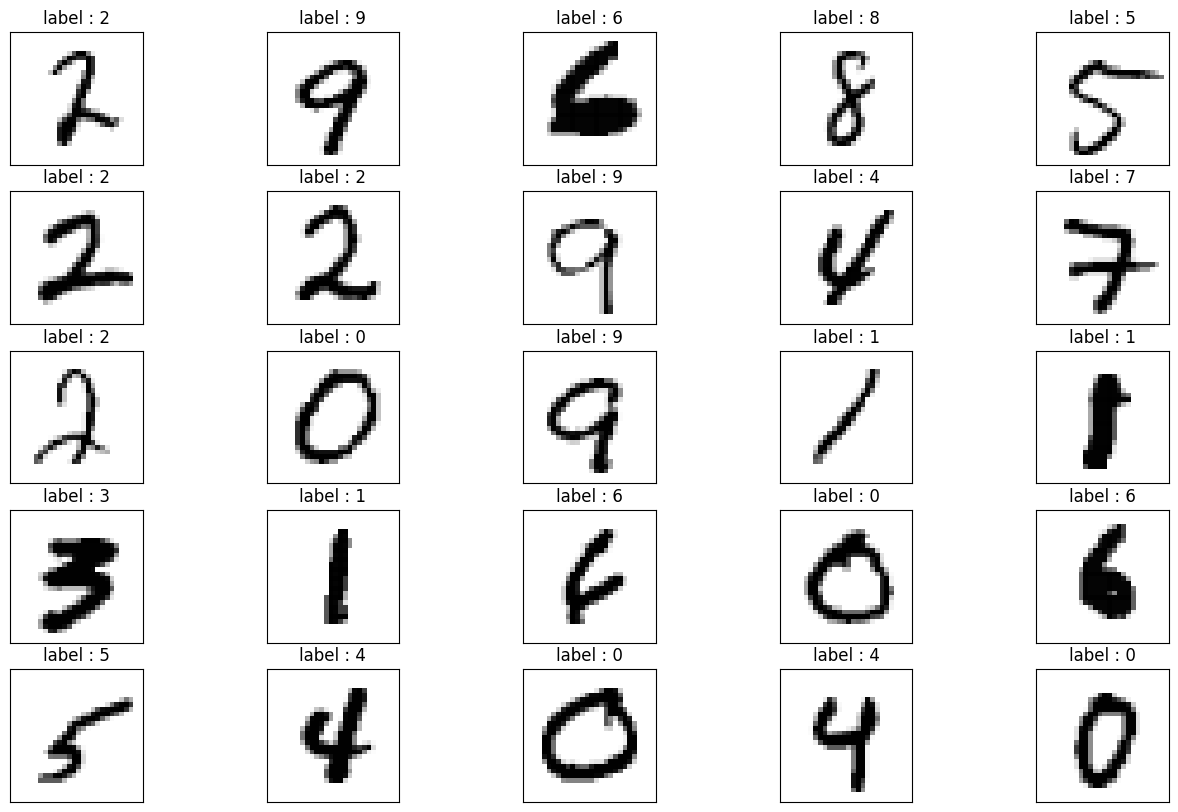

In [8]:
# Plotting multiple randomly chosen images from the dataset for insights

random_indexes = np.random.choice(range(len(X)), 25)
print("Random Indexes : ", random_indexes)

X_random = X[random_indexes]
y_random = y[random_indexes]

print("\n Shape : ", X_random.shape)

plt.figure(figsize = (16, 10))
for i in range(25):
    image = X_random[i]
    image = image.reshape((28, 28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, "binary")
    plt.title('label : {}'.format(y_random[i]))
plt.show()